# Wazobia Real Estate Limited House Sales

## Introduction

Wazobia Real Estate Limited is a prominent real estate company operating in Nigeria. With a vast portfolio of properties, they strive to provide accurate and competitive pricing for houses. We cleaned their house sales data and tired to uncover some useful trends in the data. The dataset after cleaning has 7248 rows with six feature (loc,title,bedroom,bathroom,parking_space,price), two categorical and four numeric data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('cleaned_data.csv')

In [3]:
train_data.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
2,Katsina,Penthouse,3.0,3.0,5.0,2043107.592
3,Ogun,Bungalow,1.0,1.0,6.0,1330213.036
4,Bayelsa,Apartment,3.0,2.0,2.0,1891772.069


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7248 entries, 0 to 7247
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loc            7248 non-null   object 
 1   title          7248 non-null   object 
 2   bedroom        7248 non-null   float64
 3   bathroom       7248 non-null   float64
 4   parking_space  7248 non-null   float64
 5   price          7248 non-null   float64
dtypes: float64(4), object(2)
memory usage: 339.9+ KB


### Let's look at the house distributions per state

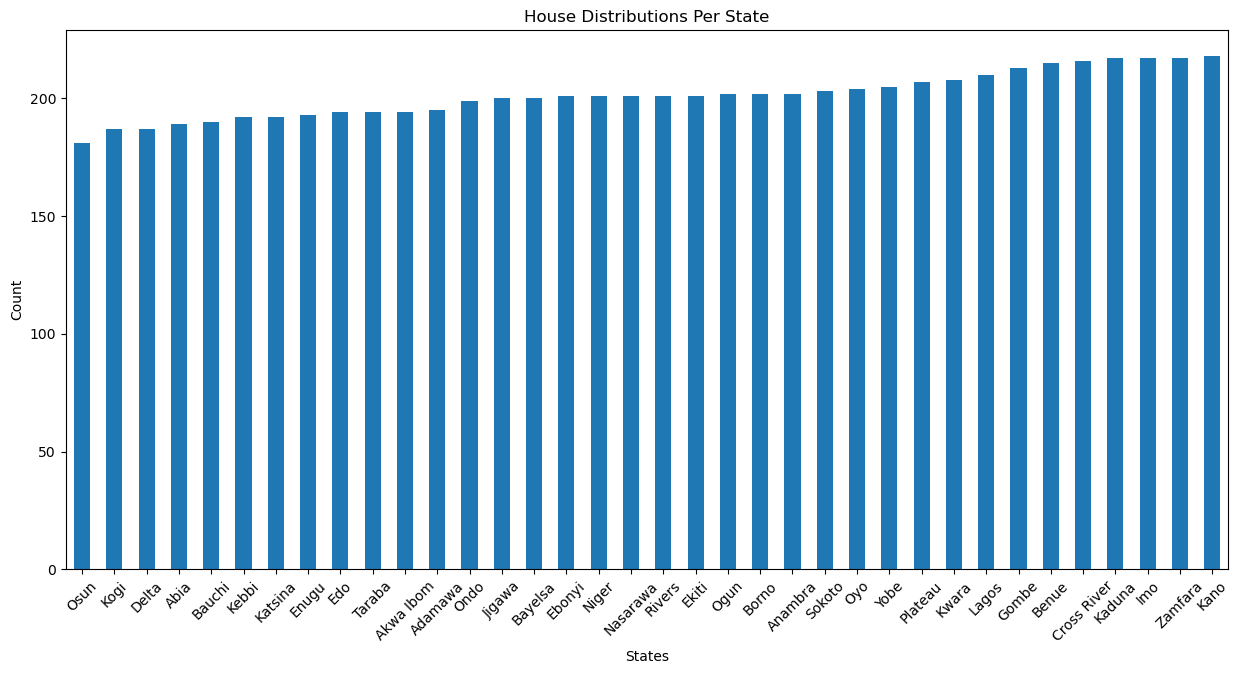

In [5]:
data = train_data.groupby('loc').count().sort_values(by='price',ascending=True)['price']
plt.figure(figsize=(15,7))
data.plot.bar();
plt.title('House Distributions Per State');
plt.ylabel("Count");
plt.xlabel("States");
plt.xticks(rotation=45);

The dataset are almost evenly distributed per state.

### Now, let's look at the house distributions per title

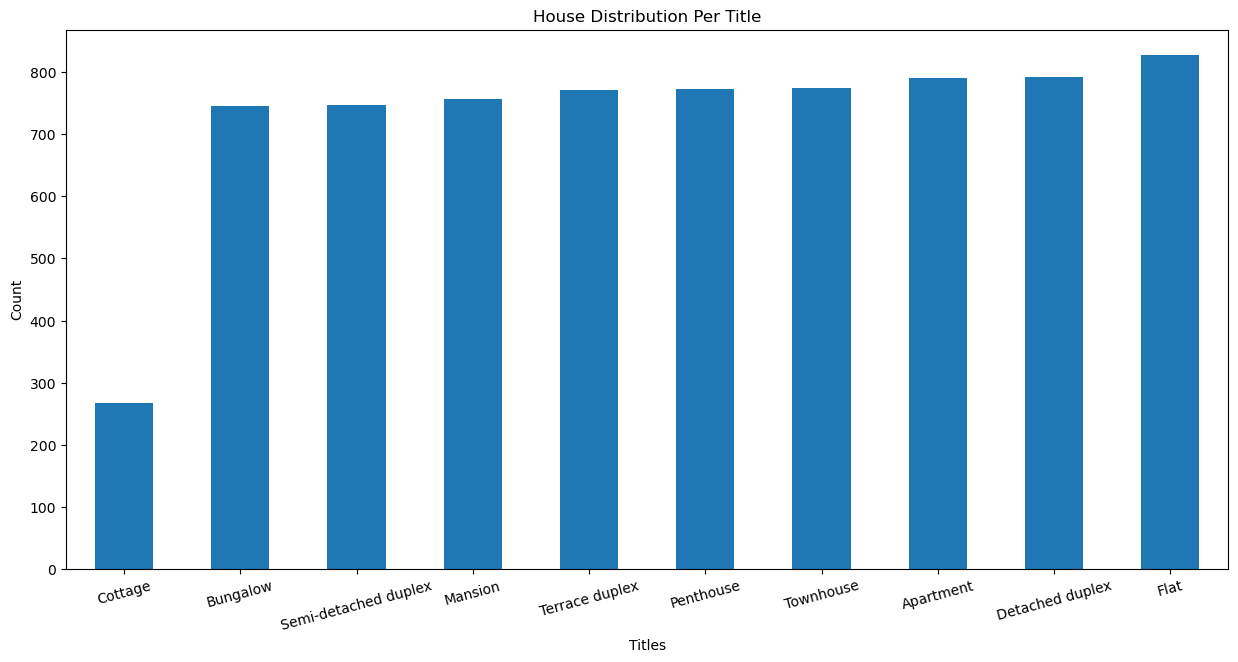

In [6]:
data = train_data.groupby('title').count().sort_values(by='price',ascending=True)['price']
plt.figure(figsize=(15,7))
data.plot.bar();
plt.title('House Distribution Per Title');
plt.ylabel("Count");
plt.xlabel("Titles");
plt.xticks(rotation=15);

The dataset with one exception (Cottage) is nearly even distributed.

### Let's investigate the median house sales per state

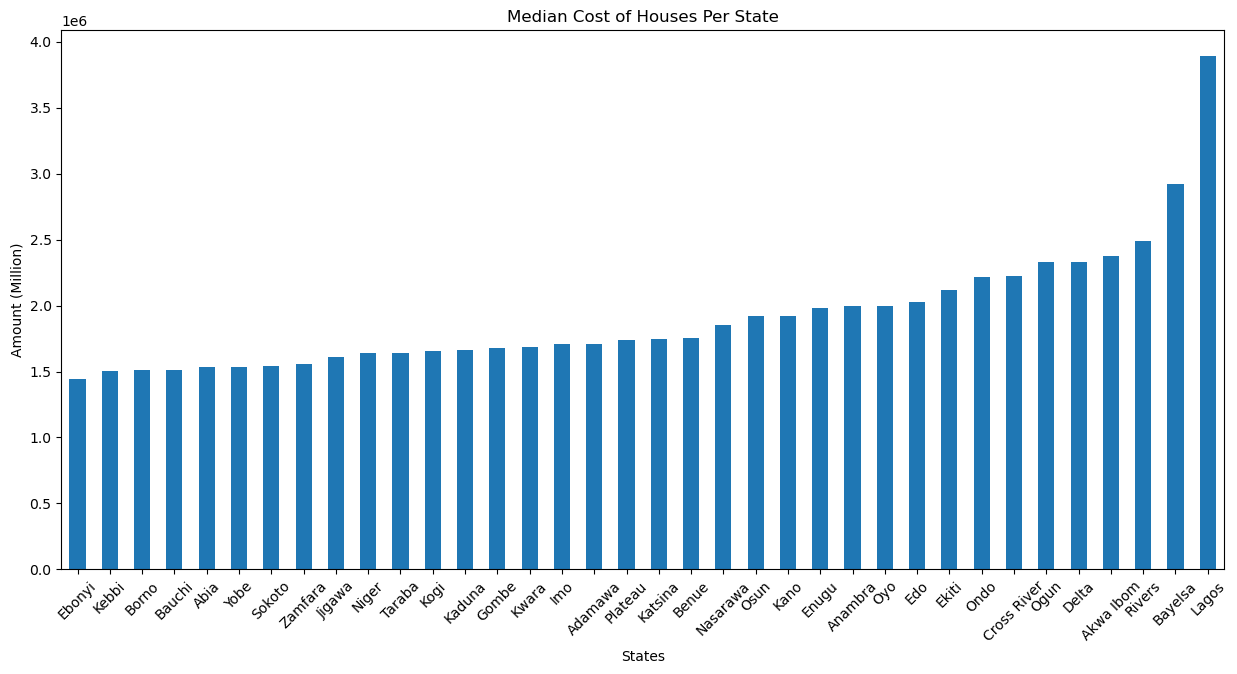

In [7]:
data = train_data.groupby('loc').median().sort_values(by='price',ascending=True)['price']
plt.figure(figsize=(15,7))
data.plot.bar();
plt.title('Median Cost of Houses Per State');
plt.ylabel("Amount (Million)");
plt.xlabel("States");
plt.xticks(rotation=45);

Ebonyi,Kebbi and Borno are the least costly while Rivers, Bayelsa and Lagos are the most costly states

### Let's investigate the median house sales per title

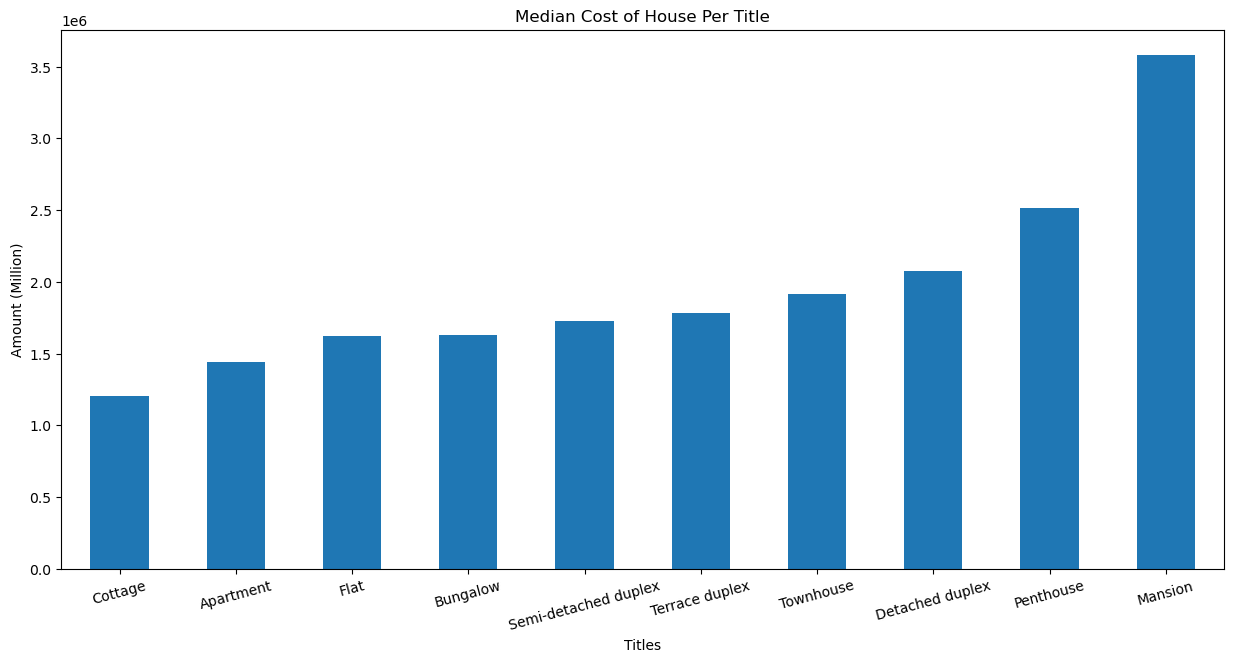

In [8]:
data = train_data.groupby('title').median().sort_values(by='price',ascending=True)['price']
plt.figure(figsize=(15,7))
data.plot.bar();
plt.title('Median Cost of House Per Title');
plt.ylabel("Amount (Million)");
plt.xlabel("Titles");
plt.xticks(rotation=15);

Cottage, Apartment and Flat are the least costly houses while Detached Duplex,Penthouse and Masion are the most costly.

### Let's investigate the correllation between number of bedrooms and price

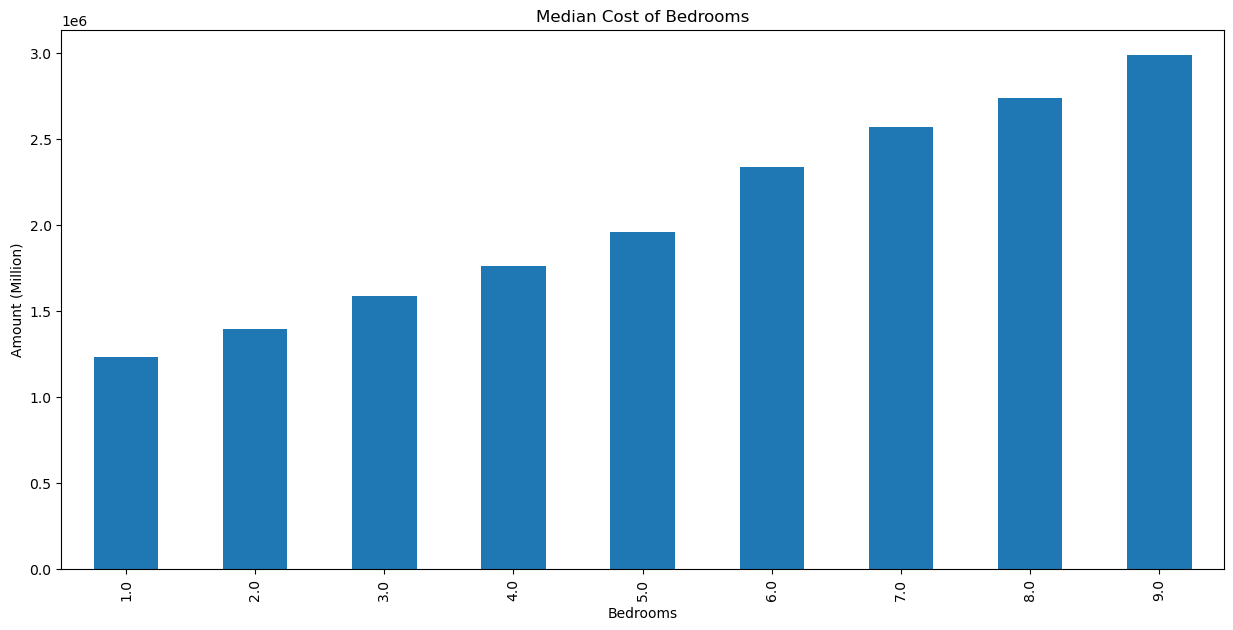

In [9]:
data = train_data.groupby('bedroom').median().sort_values(by='price',ascending=True)['price']
plt.figure(figsize=(15,7))
data.plot.bar();
plt.title('Median Cost of Bedrooms');
plt.ylabel("Amount (Million)");
plt.xlabel("Bedrooms");

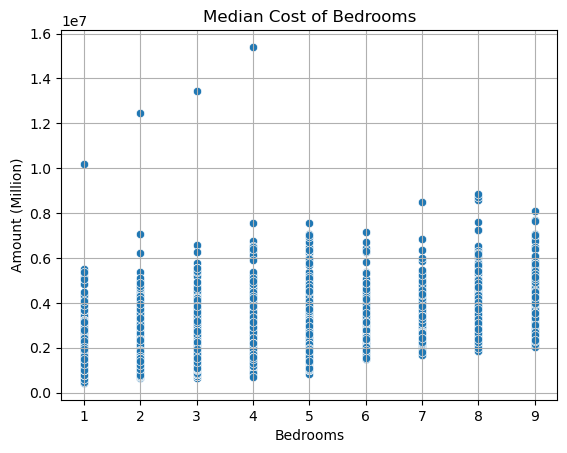

In [10]:
sns.scatterplot(x=train_data['bedroom'], y= train_data['price'])
plt.grid()
plt.title('Median Cost of Bedrooms');
plt.ylabel("Amount (Million)");
plt.xlabel("Bedrooms");

The higher the number of bedrooms the higher the prices, we are also notice the presence of outliers (very high prices)

## Let's investigate the top three costly states

<Figure size 1500x700 with 0 Axes>

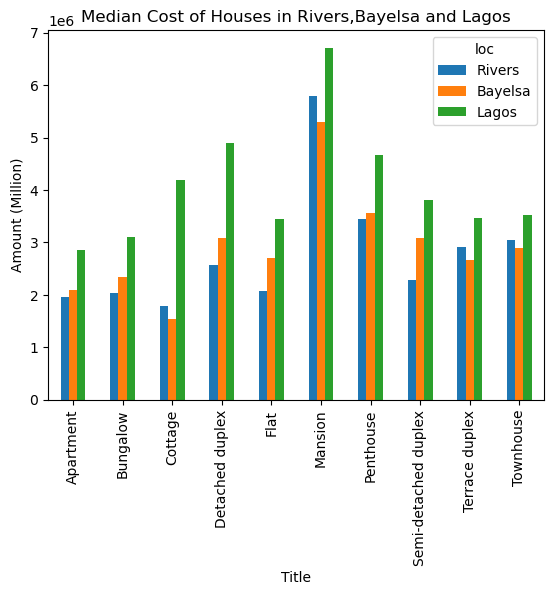

In [11]:
data = train_data.groupby(['loc','title']).median().sort_values(by='price',ascending=False)['price'].unstack().loc[['Rivers',"Bayelsa",'Lagos']]
plt.figure(figsize=(15,7));
data.T.plot.bar();
plt.title('Median Cost of Houses in Rivers,Bayelsa and Lagos');
plt.ylabel("Amount (Million)");
plt.xlabel("Title");

As expected, houses in Lagos are most costly followed by Bayelsa then Rivers. However, cottage,Terrace Duplex and mansion are more costly in Rivers than Bayelsa

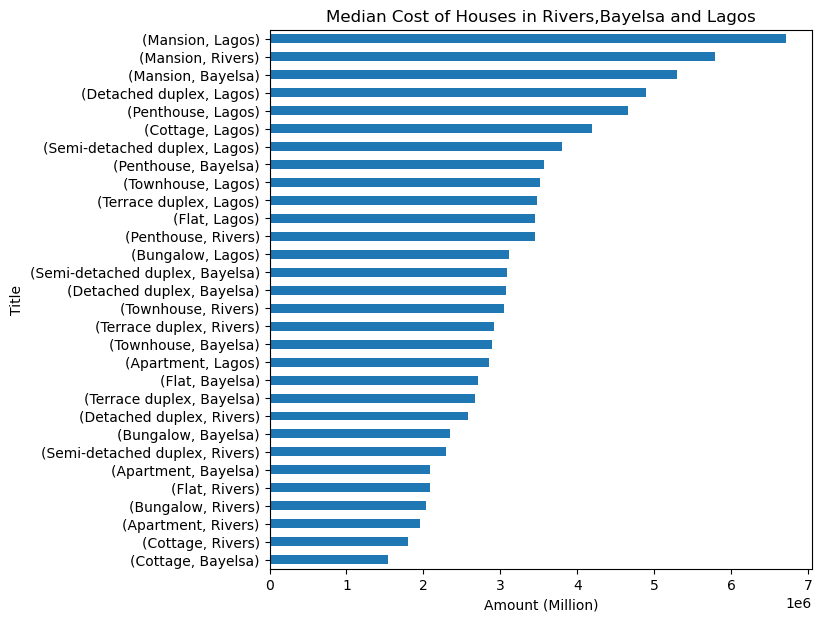

In [12]:
plt.figure(figsize=(7,7))
data.unstack().sort_values().plot.barh();
plt.title('Median Cost of Houses in Rivers,Bayelsa and Lagos');
plt.ylabel("Title");
plt.xlabel("Amount (Million)");


Cottage in Lagos is more costly than Semi-detached Duplex in Lagos and Penthouse in Bayelsa while an Apartment in Lagos is more costly than a flat in Bayelsa and a Terrace Duplex in Rivers

# Summary

We can rightly argue that a house location, number of bedroom and bathroom greatly affect the price,higher the number of bedrooms the higher the prices,Ebonyi,Kebbi and Borno are the least costly while Rivers, Bayelsa and Lagos are the most costly states. Cottage, Apartment and Flat are the least costly houses while Detached Duplex,Penthouse and Masion are the most costly.

As expected, houses in Lagos are most costly followed by Bayelsa then Rivers. However, cottage,Terrace Duplex and mansion are more costly in Rivers than Bayelsa. Cottage in Lagos is more costly than Semi-detached Duplex in Lagos and Penthouse in Bayelsa while an Apartment in Lagos is more costly than a flat in Bayelsa and a Terrace Duplex in Rivers

The dataset house distributions per state are almost even, so one can argue that the median price are not affected by quantity though we can't deny the presence of outliers. One can make a case for Cottage low median price due to its low quantity in the dataset but a closer will reveal otherview, Flat had the highest distribution yet was the 3rd lowest